In [72]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [73]:
#importamdo modo secuencial
from tensorflow.keras.models import Sequential
#importando capas que usaremos
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [74]:
# Build the Sequential feedforward neural network model
#ve que puedes asiganarle nombre
model=Sequential([
    Flatten(input_shape=(28,28)), #primera capa aplana a vector (28*28,)
    Dense(16,activation='relu',name='capa_densa'),#capa densa 16 neuronas con relu
    Dense(16,activation='relu'),#capa densa 16 neuronas con relu
    Dense(10,activation='softmax')#capa de salida con 10 neuronas (clasificador 10 posibilidades)
])

#define el mismo modelo poniendo una capa de softmax y no como funcion activacion
model1=Sequential([
    Flatten(input_shape=(28,28)), #primera capa aplana a vector (28*28,)
    Dense(16,activation='relu',name='capa_densa'),#capa densa 16 neuronas con relu
    Dense(16,activation='relu'),#capa densa 16 neuronas con relu
    Dense(10),#capa de salida con 10 neuronas (clasificador 10 posibilidades)
    Softmax() #capa de softmax
])



In [75]:
# Print the model summary

model.summary()#resumen del modelo
model1.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_23 (Flatten)         (None, 784)               0         
_________________________________________________________________
capa_densa (Dense)           (None, 16)                12560     
_________________________________________________________________
dense_35 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_36 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_24 (Flatten)         (None, 784)               0         
__________________________

***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [76]:
#modo secuencial
from tensorflow.keras.models import Sequential
#importando capas que usaremos
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [77]:
# Build the Sequential convolutional neural network model

model=Sequential([
    #capa convolucional con 16 filtros y kernel de 3*3 input_shape simepre debe llevar el numero de canales
    #(n,m,c) si no falla
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    #capa de agrupamiento maximo con kernel de 3*3
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation='softmax')
])

model1=Sequential([
    #note como agregando padding same la capa de convolucion no modifica las dimensiones de entrada
    #la mantiene igual revisa el summary
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1),padding='SAME'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation='softmax')
])

#define el mismo modelo que el anterior
model1=Sequential([
    #si el kernel del  es cuadrado se puede especificar con un solo numero usando 
    #kernel_size,pool_size
    Conv2D(16,kernel_size=3,activation='relu',input_shape=(28,28,1),padding='SAME'),
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(10,activation='softmax')
])

model2=Sequential([
    #podemos definir el tamaño de sancada en la convolucion usando strides lo que reduce mas
    #la forma de la entrada
    Conv2D(16,kernel_size=3,activation='relu',input_shape=(28,28,1),strides=2),
    MaxPooling2D(pool_size=3),
    Flatten(),
    Dense(10,activation='softmax')
])

In [50]:
# Print the model summary

model.summary()
model1.summary()
model2.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 16)        160       
__________________________

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [78]:
# Define the model optimizer, loss function and metrics

#podemos compilar el modelo asignando caracteristicas
#podemos mandar multiples metricas y metricas personalizadas ve metricas en  keras.ipynb
model.compile(
optimizer='adam',# 'sgd' 'rmsprop' 'adadelta' entre otros
loss='sparse_categorical_crossentropy', #'binary_crossentropy' 'mean_squarer_error' 'categorical_crossentropy'
metrics=['accuracy','mae'] # 'mae'   
)

#podemos compilar tambien usando objetos de keras y pasando parametros
model1.compile(
optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.9,nesterov=True),
loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.7),tf.keras.metrics.MeanAbsoluteError()]   
)

In [79]:
# Print the resulting model attributes
print('------------model------------------------------')
print(model.loss)
print(model.optimizer)
print(model.metrics)

print('------------model1------------------------------')
print(model1.loss)
print(model1.optimizer)
print(model1.optimizer.lr)
print(model1.metrics)

------------model------------------------------
sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f619c192b38>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x7f619c4ce908>]
------------model1------------------------------
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
[<tensorflow.python.keras.metrics.BinaryAccuracy object at 0x7f619c218470>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7f619c44eda0>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [80]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [81]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [82]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [83]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]
#etiqueta de entrenamiento
print(train_labels[0])
#interpretacion de etiqueta
print(labels[9])

9
Ankle boot


In [84]:
# Rescale the image values so that they lie in between 0 and 1.
train_images=train_images/255
test_images=test_images/255

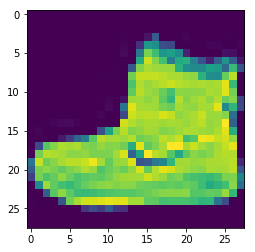

etiqueta: Ankle boot


In [85]:
# Display one of the images
i=0
img=train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"etiqueta: {labels[train_labels[i]]}")

#### Fit the model

In [88]:
# Fit the model

#si hacemos el fit asi genera error:
#Error when checking input: expected conv2d_15_input to have 4 dimensions, 
#but got array with shape (60000, 28, 28) pues en el modelo secuencial 
#definimos una dimension para el canal
#model.fit(train_images,train_labels,epochs=2,batch_size=256)

#debemos agregar una dimension extra dummie para los canales
#nota como va mostrando progreso de las metricas que establecimos
#model.fit(train_images[...,np.newaxis],train_labels,epochs=2,batch_size=256)

#el metodo fit regresa un historial del comportamiento de las metricas podemos guardarlo
history=model.fit(train_images[...,np.newaxis],train_labels,epochs=8,batch_size=256)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 59s 983us/sample - loss: 0.3871 - accuracy: 0.8644 - mae: 4.4200
Epoch 2/8
60000/60000 [==============================] - 57s 945us/sample - loss: 0.3736 - accuracy: 0.8697 - mae: 4.4200
Epoch 3/8
60000/60000 [==============================] - 57s 950us/sample - loss: 0.3619 - accuracy: 0.8744 - mae: 4.4200- loss: 0.3620 - accu
Epoch 4/8
60000/60000 [==============================] - 58s 965us/sample - loss: 0.3546 - accuracy: 0.8761 - mae: 4.4200
Epoch 5/8
60000/60000 [==============================] - 58s 967us/sample - loss: 0.3465 - accuracy: 0.8785 - mae: 4.4200
Epoch 6/8
60000/60000 [==============================] - 57s 943us/sample - loss: 0.3410 - accuracy: 0.8801 - mae: 4.4200
Epoch 7/8
60000/60000 [==============================] - 56s 932us/sample - loss: 0.3359 - accuracy: 0.8815 - mae: 4.4200
Epoch 8/8
60000/60000 [==============================] - 56s 932us/sample - loss: 0.3311 - accuracy: 0

#### Plot training history

In [89]:
# Load the history into a pandas Dataframe
df=pd.DataFrame(history.history)
df.head()

,loss,accuracy,mae
0,0.387099,0.864367,4.420000
1,0.373630,0.869733,4.420000
2,0.361936,0.874400,4.420001
3,0.354591,0.876100,4.419999
4,0.346524,0.878533,4.419999


[Text(0, 0.5, 'perdida'), Text(0.5, 0, 'epoca')]

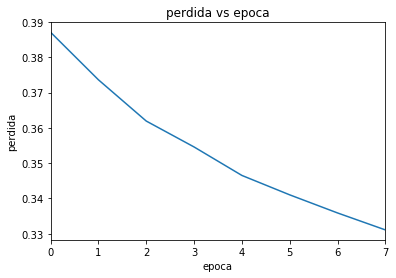

In [92]:
# Make a plot for the loss
loss_plot=df.plot(y='loss',title='perdida vs epoca',legend=False)
loss_plot.set(xlabel='epoca',ylabel='perdida')

[Text(0, 0.5, 'exactitud'), Text(0.5, 0, 'epoca')]

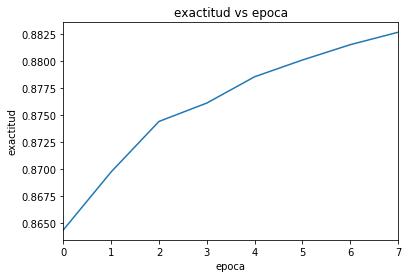

In [93]:
# Make a plot for the accuracy
accuracy_plot=df.plot(y='accuracy',title='exactitud vs epoca',legend=False)
accuracy_plot.set(xlabel='epoca',ylabel='exactitud')


[Text(0, 0.5, 'mae'), Text(0.5, 0, 'epoca')]

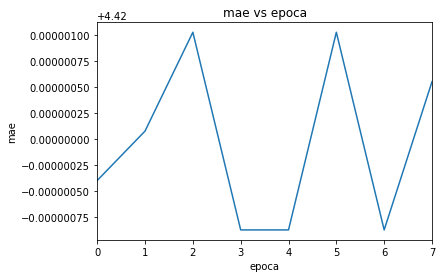

In [94]:
# Make a plot for the additional metric
mae_plot=df.plot(y='mae',title='mae vs epoca',legend=False)
mae_plot.set(xlabel='epoca',ylabel='mae')


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [97]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [99]:
# Evaluate the model

#recuerda debemos agregar dimension dummie para canales 
#verbose =0 no muestra nada 1 muestra todo 2 muestra resumen 
#asignamos lo que devuelve
test_loss, test_accuracy, test_mae=model.evaluate(test_images[...,np.newaxis],test_labels,verbose=2)


10000/1 - 6s - loss: 0.3543 - accuracy: 0.8704 - mae: 4.4200


#### Make predictions from the model

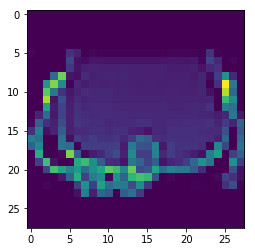

Label: Bag


In [104]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [105]:
# Get the model predictions
#recordemos que predecir espera un numero de lo lote en la primera dimencion
#y numero de canal en la ultima por lo que para una sola imagen agregamos dimension dumie en estas
#entradas
predictions=model.predict(test_image[np.newaxis,...,np.newaxis])
#es un array con las probabilodades de pertenecer a cada clase
predictions
#tomamos la maxima para ver la prediccion
print(f"probabilidad mas alta predice: {labels[np.argmax(predictions)]}")

probabilidad mas alta predice: Bag
